# Paper 1: Blalaban et al 2017, In vivo estimation of elastic heterogeneity in an infarcted human heart
https://link.springer.com/article/10.1007%2Fs10237-018-1028-5

In [10]:
from IPython.display import Image
from matplotlib.pyplot import imshow
%matplotlib inline

## key feature
* An adjoint gradient-based optimization method which can hanlde high-dimensional parameter sets
* estimating spatially resolved elastic parameters
* A patient with heart failure with previous MI and a heterogeneous distribution of fibrous tissue, left bundle branch block
* input data: medical imaging, regional strains reported on AHA 17 segments and pressures 
* scar burden is quantified using LG-MRI, the amount of myocardial fibrosis on a per region basis form SA LG-MRI

## Geometry reconstruction 

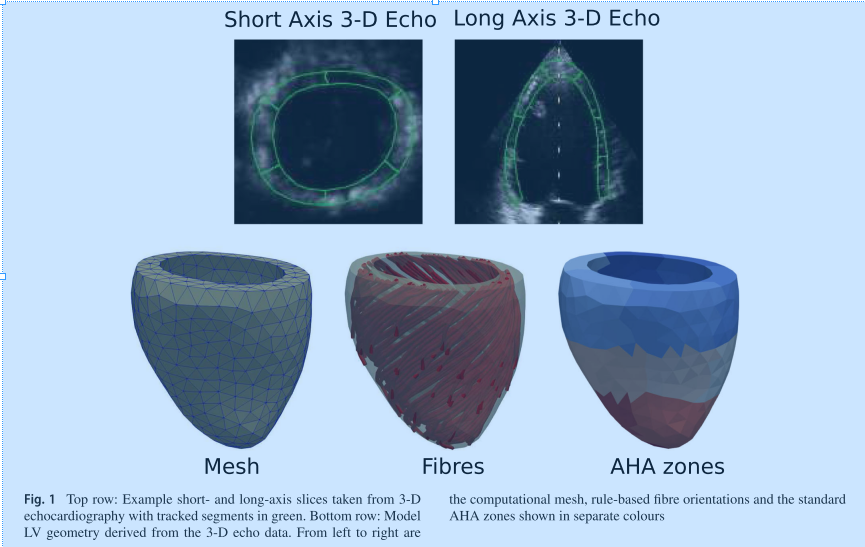

In [11]:
Image("./figures_fenics/Blalaban2017_geo.PNG", width=600, height=500)

##![](figures_fenics/Blalaban2017_geo.PNG)

* 741 Vertices and 2214 tetrahedra
* fibre orientaiton: -40$^o$ to -50$^o$

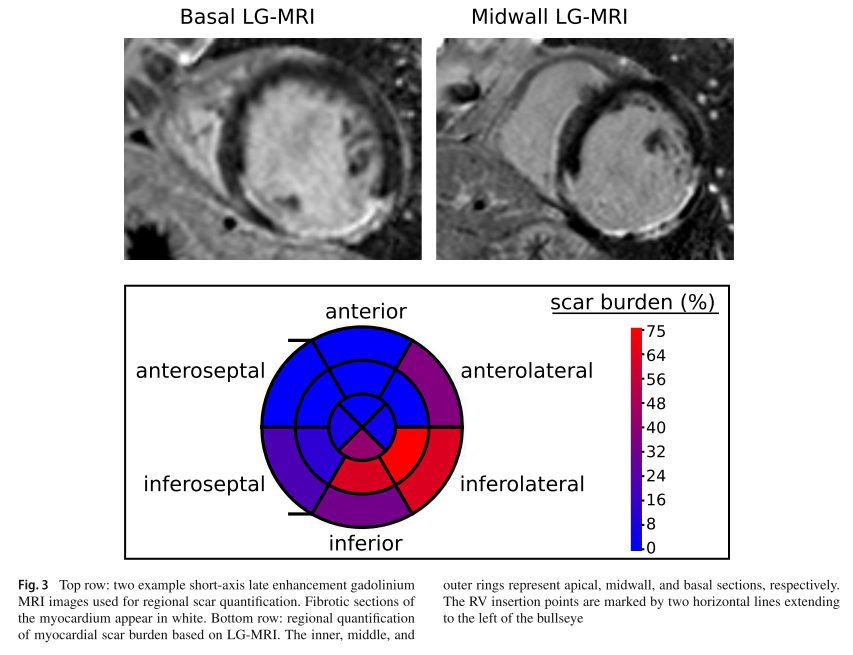

In [12]:
Image("./figures_fenics/Blalaban2017_MIBurden.PNG", width=600, height=500)

## Elastic wall motion model
* quasi-static continuum mechanics framework 

### strain energy function 
$\def \FF{\mathbb{F}}$
$\newcommand{\V}[1]{\boldsymbol{\mathrm #1}}$

$$ \psi = \frac{a}{2b}  ( e^{b(I_1 -3)} -1) + \frac{a_f}{2b_f}( e^{b_f(I_{4f} -1 )^2 } -1)  $$
in which $a,b, a_f, b_f$ are material parameters, spatially varied. 

The total variational form is 
$$ \int_\Omega (\V{P} + pJ\vec{\FF}^{-T}): \text{Grad} \delta \,\V{u} dV + \int_\Omega (J-1) \delta p dV + \int_{\partial \Omega_\text{base}} k \V{u} \cdot \delta \V{u} d S + p_\text{blood} \int_{\partial \Omega_\text{endo}} J \FF^{-T}\V{N}\cdot \delta \V{u} dS = 0$$
fro all admissible variatios $\delta \V{u}$ and $\delta p$ in the displacement and pressure respectively.

## Least square minimization
The mismatch is defined as
$$ I_\text{data} = \sum_{i=1}^{N_m} \sum_{j=1}^{N_r} \sum_{k \in \{ c,r,l\}} (\V{F}_\text{model}^{i,j,k}   - \sum_{k \in \{ c,r,l\}} (\V{F}_\text{measured}^{i,j,k} )   $$
in which $N_m = 7$ is the number of strains available in systole and $N_r = 16$ the number of AHA regions.

To constrain the minimization problem, introduced a first-order Tikhonov regularization functional favouring more smooth material parameter sets,
$$ I_\text{smooth} = \frac{1}{|\Omega|} \sum_{z \in (a, b, a_f, b_f)} \int_\Omega |\text{Grad} z|^2 dV  $$

The optimization problem then becomes 
$$ \min_{a, b, a_f, b_f} I = \min_{a, b, a_f, b_f}(I_\text{data} + \lambda I_\text{smooth}) $$

This optimization is carried out by a sequential quadratic programming algorithm. Each iteration requires one or more evaluations of the above functional and the gradient of the functional with respect to all of the material parameter variables. 

<font color='blue'>The gradient is calculated efficiently by the adjoint gradient method by the software package dolfin-adjoint. The computational cost does not depend on the number of optimization <font>

# Paper 2: Estimating Cardiac contraction through high resolution data assimilation of a personalized mechanical model
Henrik Finsberg et al 2017
* adjoint-based data assimilation techniques are used to rapidly estimate cardiac mechanical inforamtion on a cohort of heart failure patients, and compared with a healthy control group

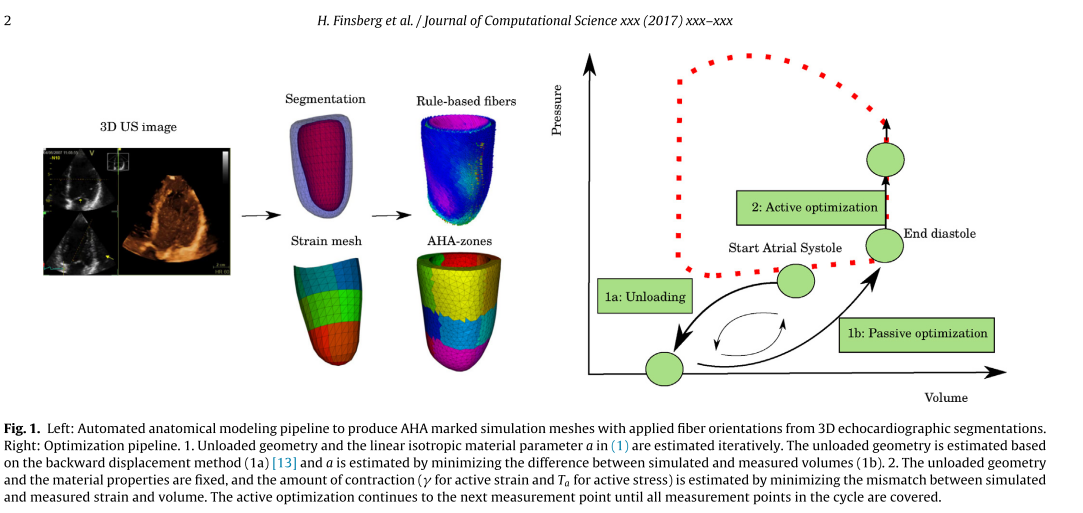

In [13]:
Image("figures_fenics/Finsberg2017_geo.PNG", width=800, height=500) 

Same strain energy function, active strain model 
$$ \FF = \FF_e \FF_a $$
$$ \FF_a = (1-\gamma) \V{f}_0 \otimes \V{f}_0 + \frac{1}{\sqrt(1-\gamma)}(\V{I} - \V{f}_0\otimes \V{f}_0)$$
in which $\gamma$ is the relative active shortening along the fibers. 


Optimization 
$$ \text{minimize}_m \, \, \alpha(\frac{V^i-\tilde{V^i}}{V_i}) + (1-\alpha) \sum_{j=1}^{17} \sum_{k \in (c, r, l)} (\epsilon_{kl}^i - \tilde{\epsilon}_{kj}^i) + \lambda |\nabla m^i|^2$$
in which $m$ is the parameter set

**Optimization procedure**
1. passive phase: estimate $a$ and estimate the unloaded configureation at the same time
2. active phase for estimating $\gamma$ or $T_a$

**Estimate of end-systolic elastance**
$$E_{ES} = \frac{\Delta p_{lv}}{\Delta V}$$
if known $p_{lv}^{ES+\Delta } = p_{lv}^{ES} + \Delta p_{lv}$ and resulting in a change in volume $V^{ES + \Delta} = V^{ES} + \Delta V$


*Note: estimating the unloaded configuration may be improtatn to capture the correct material parameters, but seemed to have less of an impact in systole, as the overall estimated ventricular elastnace was unchanged.*
